# Вопросы по датасету
- Необходимо предсказать рейтинг компании на основании некоторых данных, полученных на основе полученных данных по кол-ву интервью в данной компании, зарплате и т.д.
- 10000 данных, 10 признаков
- Company_name, Highly_rated_for, Critically_rated_for - категориальные; Description - Текстовый; Ratings, Total_reviews, Avg_salary, Interviews_taken, Total_jobs_available, Total_benefits - количественные
- Были пропущенные значения они были в виде "--"
- Company_Ratings было разделено на 3 класса: Not good, Average, Good
    2    6899
    1    3058
    0      43
- Стандартизация
- Логистическая регрессия оказалась хуже по точности 0.6932
- Точность Random Forest оказалась самой лучшей, на тренировочной выборке 1.0, на тестовой 0.9992

# Загрузка данных

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [2]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/bhavikjikadara/top-worlds-companies"
od.download(url)

Skipping, found downloaded files in ".\top-worlds-companies" (use force=True to force download)


- Company_name: The name of the company listed on the Ambition Box.
- Description: A brief description of the company, often sourced from its profile or website.
- Ratings: The overall rating of the company as provided by users on Ambition Box.
- Highly_rated_for: Areas or aspects of the company that are highly rated by users.
- Critically_rated_for: Areas or aspects of the company that are critically rated by users.
- Total_reviews: The total number of reviews submitted for the company on Ambition Box.
- Avg_salary: The average salary reported for the company, if available.
- Interviews_taken: The number of interviews conducted by the company, if available.
- Total_jobs_available: The total number of job positions available within the company.
- Total_benefits: Information on benefits offered by the company, if provided.

In [3]:
import pandas as pd
import os
pwd = os.getcwd()
dataset = pd.read_csv(pwd + '/top-worlds-companies/companies.csv')
dataset.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


## Информация о датасете

In [4]:
dataset.describe()

,Ratings
count,10000.000000
mean,3.894710
std,0.385894
min,1.300000
25%,3.700000
50%,3.900000
75%,4.100000
max,5.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Critically_rated_for  2807 non-null   object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


# Импорт библиотек

# Работа с данными

In [6]:

def convert_thousands(column): 
    if 'k' in str(column):
        return float(column.replace('k', '')) * 1000
    elif column == "--":
        return np.nan
    else:
        try:
            return float(column)
        except ValueError:
            return np.nan
dataset['Avg_salary'] = dataset['Avg_salary'].apply(convert_thousands)
dataset['Total_reviews'] = dataset['Total_reviews'].apply(convert_thousands)
dataset['Interviews_taken'] = dataset['Interviews_taken'].apply(convert_thousands)
dataset['Total_jobs_available'] = dataset['Total_jobs_available'].apply(convert_thousands)
dataset['Total_benefits'] = dataset['Total_benefits'].apply(convert_thousands)

In [7]:
dataset.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847.0,11500.0
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460.0,5800.0
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405.0,5000.0
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719.0,4000.0


In [8]:

dataset['Total_reviews'] = pd.to_numeric(dataset['Total_reviews'], errors='coerce')
dataset['Interviews_taken'] = pd.to_numeric(dataset['Interviews_taken'], errors='coerce')
dataset['Total_jobs_available'] = pd.to_numeric(dataset['Total_jobs_available'], errors='coerce')
dataset['Total_benefits'] = pd.to_numeric(dataset['Total_benefits'], errors='coerce')

In [9]:
splitted_higly_rated = dataset['Highly_rated_for'].str.split(',',expand=True)
splitted_higly_rated.columns = ['Highly_first_rated', 'Highly_second_rated', 'Highly_third_rated']
splitted_higly_rated.head()

,Highly_first_rated,Highly_second_rated,Highly_third_rated
0,Job Security,Work Life Balance,None
1,Company Culture,Skill Development / Learning,Job Security
2,Skill Development / Learning,None,None
3,Job Security,None,None
4,Job Security,Work Life Balance,Skill Development / Learning


In [10]:
final_dataset = pd.concat([dataset,splitted_higly_rated],axis=1)
final_dataset.drop('Highly_rated_for', axis=1, inplace=True)
final_dataset.drop('Critically_rated_for',axis=1, inplace=True)
final_dataset.drop('Description', axis=1, inplace=True)
final_dataset.head()

,Company_name,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Highly_first_rated,Highly_second_rated,Highly_third_rated
0,TCS,3.8,73100.0,856900.0,6100.0,847.0,11500.0,Job Security,Work Life Balance,None
1,Accenture,4.0,46400.0,584600.0,4300.0,9900.0,7100.0,Company Culture,Skill Development / Learning,Job Security
2,Cognizant,3.9,41700.0,561500.0,3600.0,460.0,5800.0,Skill Development / Learning,None,None
3,Wipro,3.8,39200.0,427400.0,3700.0,405.0,5000.0,Job Security,None,None
4,Capgemini,3.9,34000.0,414400.0,2800.0,719.0,4000.0,Job Security,Work Life Balance,Skill Development / Learning


In [11]:

for column in ['Highly_first_rated', 'Highly_second_rated', 
             'Highly_third_rated']:
    final_dataset[column] = final_dataset[column].astype("category")
final_dataset['Company_name'] = final_dataset['Company_name'].astype("string")
final_dataset.columns

Index(['Company_name', 'Ratings', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits',
       'Highly_first_rated', 'Highly_second_rated', 'Highly_third_rated'],
      dtype='object')

In [12]:
final_dataset.head()

,Company_name,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Highly_first_rated,Highly_second_rated,Highly_third_rated
0,TCS,3.8,73100.0,856900.0,6100.0,847.0,11500.0,Job Security,Work Life Balance,NaN
1,Accenture,4.0,46400.0,584600.0,4300.0,9900.0,7100.0,Company Culture,Skill Development / Learning,Job Security
2,Cognizant,3.9,41700.0,561500.0,3600.0,460.0,5800.0,Skill Development / Learning,NaN,NaN
3,Wipro,3.8,39200.0,427400.0,3700.0,405.0,5000.0,Job Security,NaN,NaN
4,Capgemini,3.9,34000.0,414400.0,2800.0,719.0,4000.0,Job Security,Work Life Balance,Skill Development / Learning


In [13]:
final_dataset.dtypes

Company_name            string[python]
Ratings                        float64
Total_reviews                  float64
Avg_salary                     float64
Interviews_taken               float64
Total_jobs_available           float64
Total_benefits                 float64
Highly_first_rated            category
Highly_second_rated           category
Highly_third_rated            category
dtype: object

In [14]:
final_dataset.isna().sum() * 100 / len(final_dataset)

Company_name             0.00
Ratings                  0.00
Total_reviews            0.00
Avg_salary               0.02
Interviews_taken         2.19
Total_jobs_available    39.23
Total_benefits           0.79
Highly_first_rated       0.92
Highly_second_rated     16.18
Highly_third_rated      27.90
dtype: float64

In [15]:
final_dataset.isna().sum() * 100 / len(final_dataset)

Company_name             0.00
Ratings                  0.00
Total_reviews            0.00
Avg_salary               0.02
Interviews_taken         2.19
Total_jobs_available    39.23
Total_benefits           0.79
Highly_first_rated       0.92
Highly_second_rated     16.18
Highly_third_rated      27.90
dtype: float64

In [16]:
final_dataset.describe()

,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
count,10000.000000,10000.000000,9998.000000,9781.000000,6077.000000,9921.000000
mean,3.894710,415.084500,2382.855271,25.612207,34.227909,53.982461
std,0.385894,1626.985439,15836.034796,136.491758,172.260663,227.675982
min,1.300000,72.000000,2.000000,1.000000,1.000000,1.000000
25%,3.700000,97.000000,479.000000,4.000000,3.000000,11.000000
50%,3.900000,148.000000,775.000000,8.000000,9.000000,19.000000
75%,4.100000,295.000000,1500.000000,17.000000,26.000000,39.000000
max,5.000000,73100.000000,856900.000000,6100.000000,9900.000000,11500.000000


In [17]:
final_dataset.corr(numeric_only=True)

,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
Ratings,1.000000,0.026849,-0.000605,0.001453,-0.014181,0.036120
Total_reviews,0.026849,1.000000,0.910773,0.939968,0.438376,0.975186
Avg_salary,-0.000605,0.910773,1.000000,0.949636,0.491575,0.932747
Interviews_taken,0.001453,0.939968,0.949636,1.000000,0.470614,0.956836
Total_jobs_available,-0.014181,0.438376,0.491575,0.470614,1.000000,0.454846
Total_benefits,0.036120,0.975186,0.932747,0.956836,0.454846,1.000000


In [18]:
np.random.seed(42) # для повторяемости эксперимента
rand_data = np.random.choice(np.arange(final_dataset.shape[0]), size=500, replace=False)

# Scatter plot

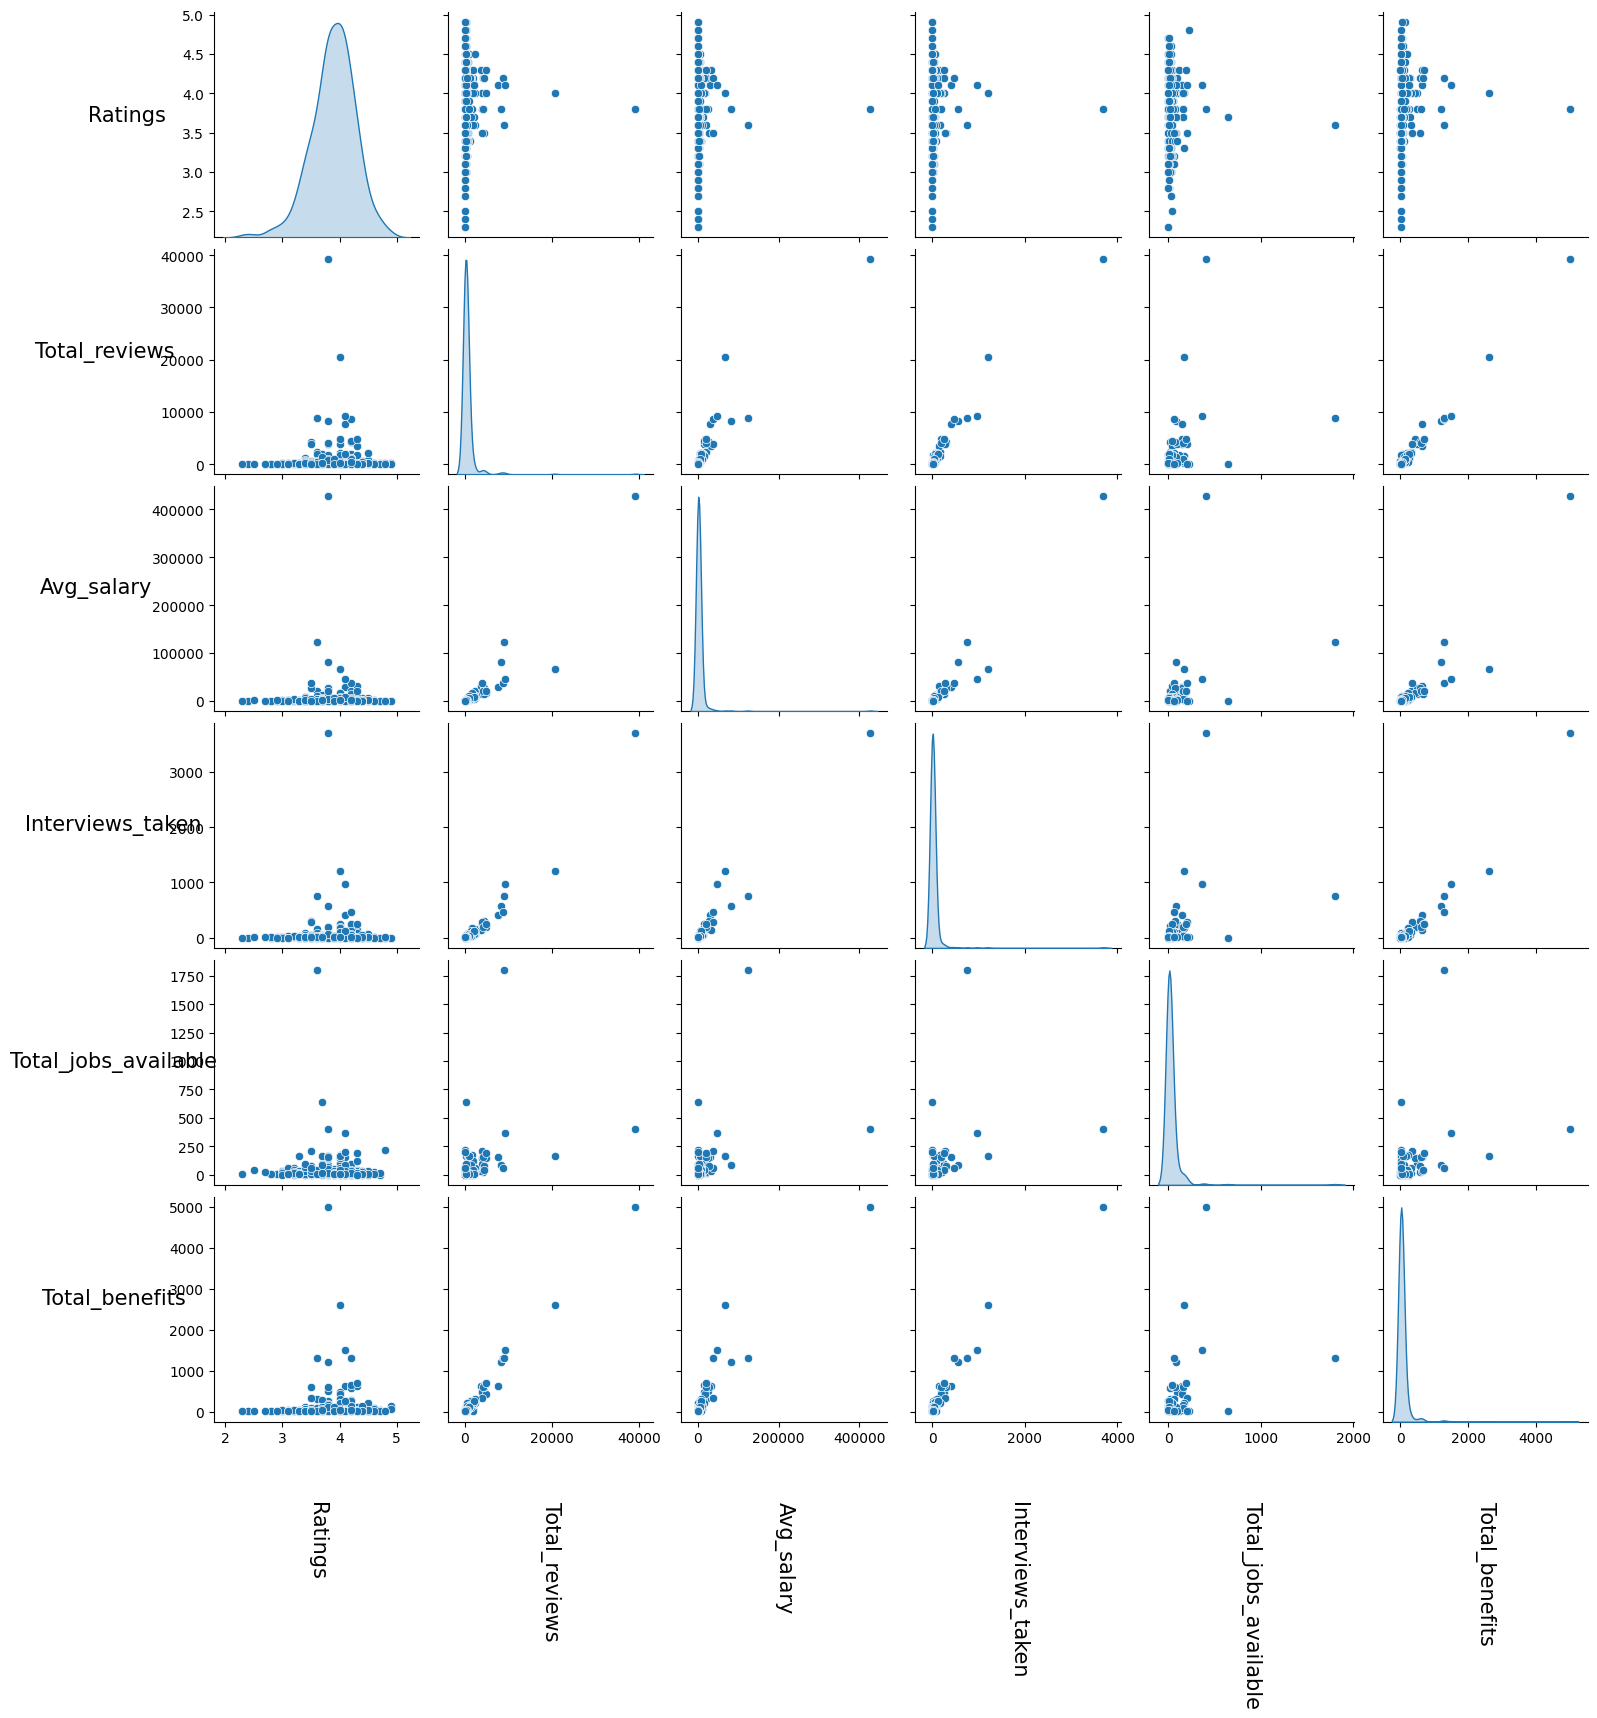

In [19]:

g = sns.pairplot(final_dataset.iloc[rand_data], diag_kind='kde')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-90, fontsize=15, labelpad=40);
    ax.set_ylabel(ax.get_ylabel(), rotation=0, fontsize=15, labelpad=40);

# Heatmap

<Axes: >

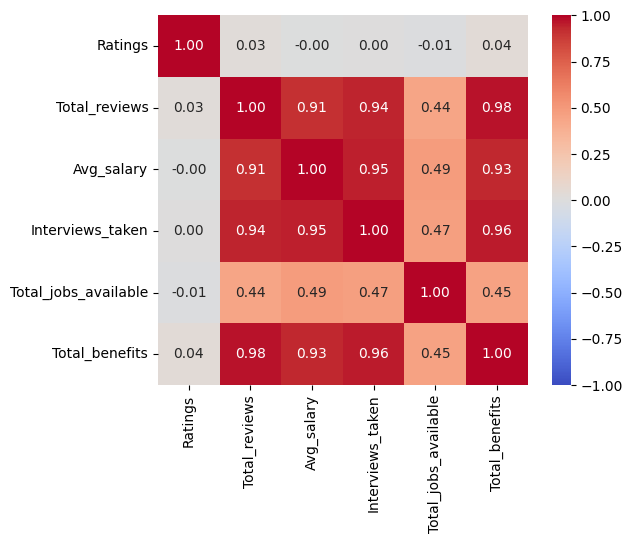

In [20]:
sns.heatmap(final_dataset.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f', square=True)

# Продолжение работы с данными

In [21]:
for category in ('Highly_first_rated', 'Highly_second_rated', 'Highly_third_rated'):
    dummies = pd.get_dummies(final_dataset[category])
    dummies.columns = ["{} + {}".format(category, column) for column in dummies.columns.tolist()]
    final_dataset = pd.concat((final_dataset, dummies), axis=1)
    final_dataset.drop([category], axis=1, inplace=True)
final_dataset.columns

Index(['Company_name', 'Ratings', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits',
       'Highly_first_rated + Company Culture',
       'Highly_first_rated + Job Security',
       'Highly_first_rated + Promotions / Appraisal',
       'Highly_first_rated + Salary & Benefits',
       'Highly_first_rated + Skill Development / Learning',
       'Highly_first_rated + Work Life Balance',
       'Highly_first_rated + Work Satisfaction',
       'Highly_second_rated +  Company Culture',
       'Highly_second_rated +  Job Security',
       'Highly_second_rated +  Promotions / Appraisal',
       'Highly_second_rated +  Salary & Benefits',
       'Highly_second_rated +  Skill Development / Learning',
       'Highly_second_rated +  Work Life Balance',
       'Highly_second_rated +  Work Satisfaction',
       'Highly_third_rated +  Company Culture',
       'Highly_third_rated +  Job Security',
       'Highly_third_rated +  Promotions / Appraisal',


In [22]:
for category in ('Company Culture', 'Job Security', 'Promotions / Appraisal', 'Salary & Benefits', 'Skill Development / Learning', 'Work Life Balance', 'Work Satisfaction'):
    final_dataset[category] = final_dataset[f'Highly_first_rated + {category}'] | final_dataset[f'Highly_second_rated +  {category}'] | final_dataset[f'Highly_third_rated +  {category}']
    final_dataset.drop(f'Highly_first_rated + {category}', axis=1, inplace=True)
    final_dataset.drop(f'Highly_second_rated +  {category}',axis=1, inplace=True)
    final_dataset.drop(f'Highly_third_rated +  {category}',axis=1,inplace=True)

In [23]:
final_dataset.head()

,Company_name,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Company Culture,Job Security,Promotions / Appraisal,Salary & Benefits,Skill Development / Learning,Work Life Balance,Work Satisfaction
0,TCS,3.8,73100.0,856900.0,6100.0,847.0,11500.0,False,True,False,False,False,True,False
1,Accenture,4.0,46400.0,584600.0,4300.0,9900.0,7100.0,True,True,False,False,True,False,False
2,Cognizant,3.9,41700.0,561500.0,3600.0,460.0,5800.0,False,False,False,False,True,False,False
3,Wipro,3.8,39200.0,427400.0,3700.0,405.0,5000.0,False,True,False,False,False,False,False
4,Capgemini,3.9,34000.0,414400.0,2800.0,719.0,4000.0,False,True,False,False,True,True,False


In [24]:
final_dataset['Company_Ratings'] = pd.cut(final_dataset['Ratings'], 3, labels=['Not good', 'Average', 'Good'])
template = {
    "Not good":0,
    "Average":1,
    "Good":2
}
final_dataset['Company_Ratings'] = final_dataset['Company_Ratings'].map(template).astype('int64')
final_dataset.fillna(final_dataset.median(numeric_only=True, axis=0), axis=0 , inplace=True)

In [25]:
final_dataset.isna().sum()

Company_name                    0
Ratings                         0
Total_reviews                   0
Avg_salary                      0
Interviews_taken                0
Total_jobs_available            0
Total_benefits                  0
Company Culture                 0
Job Security                    0
Promotions / Appraisal          0
Salary & Benefits               0
Skill Development / Learning    0
Work Life Balance               0
Work Satisfaction               0
Company_Ratings                 0
dtype: int64

In [26]:
final_dataset.drop('Company_name', axis=1, inplace=True)

In [27]:
final_dataset.head()

,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Company Culture,Job Security,Promotions / Appraisal,Salary & Benefits,Skill Development / Learning,Work Life Balance,Work Satisfaction,Company_Ratings
0,3.8,73100.0,856900.0,6100.0,847.0,11500.0,False,True,False,False,False,True,False,2
1,4.0,46400.0,584600.0,4300.0,9900.0,7100.0,True,True,False,False,True,False,False,2
2,3.9,41700.0,561500.0,3600.0,460.0,5800.0,False,False,False,False,True,False,False,2
3,3.8,39200.0,427400.0,3700.0,405.0,5000.0,False,True,False,False,False,False,False,2
4,3.9,34000.0,414400.0,2800.0,719.0,4000.0,False,True,False,False,True,True,False,2


In [28]:
final_dataset.dtypes

Ratings                         float64
Total_reviews                   float64
Avg_salary                      float64
Interviews_taken                float64
Total_jobs_available            float64
Total_benefits                  float64
Company Culture                    bool
Job Security                       bool
Promotions / Appraisal             bool
Salary & Benefits                  bool
Skill Development / Learning       bool
Work Life Balance                  bool
Work Satisfaction                  bool
Company_Ratings                   int64
dtype: object

In [29]:
standardization = (final_dataset - final_dataset.mean(axis=0)) / final_dataset.std(axis=0)
standardization.head()

,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Company Culture,Job Security,Promotions / Appraisal,Salary & Benefits,Skill Development / Learning,Work Life Balance,Work Satisfaction,Company_Ratings
0,-0.245430,44.674595,53.965659,44.993870,6.100826,50.469572,-0.900658,1.032891,-0.692273,-0.651505,-0.731023,1.210762,-0.565774,0.664032
1,0.272847,28.263876,36.768996,31.661856,73.236917,31.068872,1.110188,1.032891,-0.692273,-0.651505,1.367809,-0.825844,-0.565774,0.664032
2,0.013708,25.375098,35.310153,26.477184,3.230875,25.336847,-0.900658,-0.968060,-0.692273,-0.651505,1.367809,-0.825844,-0.565774,0.664032
3,-0.245430,23.838514,26.841286,27.217851,2.823001,21.809447,-0.900658,1.032891,-0.692273,-0.651505,-0.731023,-0.825844,-0.565774,0.664032
4,0.013708,20.642419,26.020292,20.551844,5.151592,17.400197,-0.900658,1.032891,-0.692273,-0.651505,1.367809,1.210762,-0.565774,0.664032


In [30]:
y = final_dataset['Company_Ratings']
x = final_dataset.drop('Company_Ratings', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


# Метод k ближайших соседей

In [31]:

train_scores = []
test_scores = []
for k in range(1, 22, 2):
    print(f'Обработка k = {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))
print('Обработка завершена')



Обработка k = 1


Обработка k = 3
Обработка k = 5
Обработка k = 7
Обработка k = 9
Обработка k = 11
Обработка k = 13
Обработка k = 15
Обработка k = 17
Обработка k = 19
Обработка k = 21
Обработка завершена


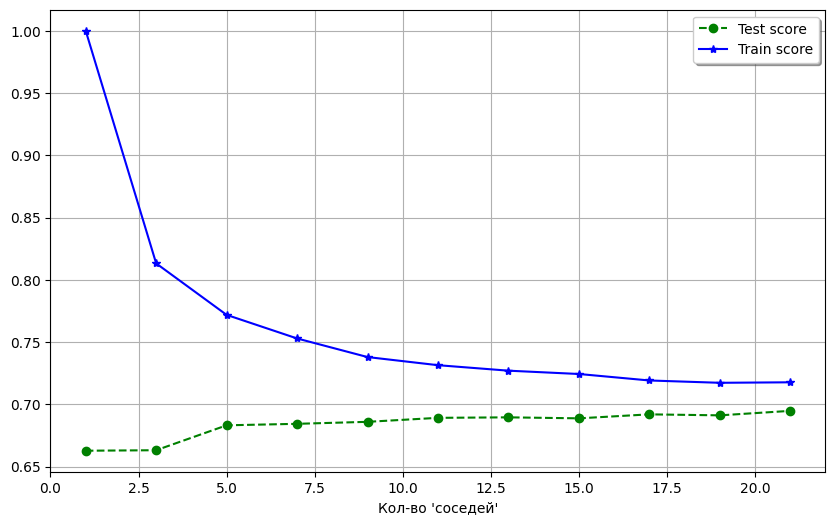

In [32]:
x_data = np.arange(1, 22, 2)
plt.figure(figsize=(10, 6))
plt.plot(x_data, test_scores, label='Test score', color='green', marker='o', linestyle='dashed')
plt.plot(x_data, train_scores, label='Train score', color='blue', marker='*')
plt.grid()
plt.xlabel("Кол-во 'соседей'")
plt.legend(shadow=True, loc='best')
pass

In [33]:
c = 0
print('Коэффициент детерминации при k =')
for i in range(1, 22, 2):
    print(f' {i} на тестовой выборке: {test_scores[c]} \t на тренировочной выборке: {train_scores[c]}')
    c += 1

Коэффициент детерминации при k =
 1 на тестовой выборке: 0.6628 	 на тренировочной выборке: 1.0
 3 на тестовой выборке: 0.6632 	 на тренировочной выборке: 0.8132
 5 на тестовой выборке: 0.6832 	 на тренировочной выборке: 0.7718666666666667
 7 на тестовой выборке: 0.6844 	 на тренировочной выборке: 0.7529333333333333
 9 на тестовой выборке: 0.686 	 на тренировочной выборке: 0.738
 11 на тестовой выборке: 0.6892 	 на тренировочной выборке: 0.7314666666666667
 13 на тестовой выборке: 0.6896 	 на тренировочной выборке: 0.7270666666666666
 15 на тестовой выборке: 0.6888 	 на тренировочной выборке: 0.7244
 17 на тестовой выборке: 0.692 	 на тренировочной выборке: 0.7192
 19 на тестовой выборке: 0.6912 	 на тренировочной выборке: 0.7173333333333334
 21 на тестовой выборке: 0.6948 	 на тренировочной выборке: 0.7177333333333333


# Логистическая регрессия

In [34]:
model = LogisticRegression()
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score  = model.score(x_test, y_test)
print(f'Точность логистической регрессии на тренировочной выборке {train_score} \n На тестовой {test_score}')

Точность логистической регрессии на тренировочной выборке 0.6884 
 На тестовой 0.6932


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [35]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score  = model.score(x_test, y_test)
print(f'Точность Random Forest на тренировочной выборке {train_score} \n На тестовой {test_score}')

Точность Random Forest на тренировочной выборке 1.0 
 На тестовой 0.9992
